In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sms_data = pd.read_csv('sms.csv', encoding='latin-1', sep=',', usecols=[0, 1])

sms_data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms_data.shape

(5572, 2)

In [4]:
sms_data.isnull().sum()

Label      0
Message    0
dtype: int64

In [5]:
sms_data.duplicated().sum()

403

In [6]:
sms_data.drop_duplicates(inplace=True)
sms_data.reset_index(drop=True, inplace=True)
sms_data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sms_data.duplicated().sum()

0

In [8]:
sms_data.shape

(5169, 2)

In [9]:
sms_data['Label'].value_counts()

Label
ham     4516
spam     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1b14c390b20>,
 [Text(0.5038421623606261, -0.977825687649782, 'ham'),
  Text(-0.5038422539112726, 0.9778256404766694, 'spam')],
 [Text(0.2748229976512505, -0.5333594659907901, '87.4%'),
  Text(-0.27482304758796683, 0.5333594402600015, '12.6%')])

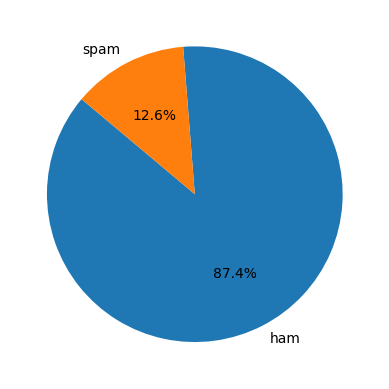

In [10]:
plt.pie(sms_data['Label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=140)

In [11]:
email_data = pd.read_csv('emails.csv', encoding='latin-1', sep=',', usecols=[1,2])

email_data.head()

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [12]:
email_data.shape

(5171, 2)

In [13]:
email_data['Label'].value_counts()

Label
ham     3672
spam    1499
Name: count, dtype: int64

In [14]:
email_data.isna().sum()

Label      0
Message    0
dtype: int64

In [15]:
email_data.duplicated().sum()

178

In [16]:
email_data.drop_duplicates(inplace=True)
email_data.reset_index(drop=True, inplace=True) 
email_data.duplicated().sum()

0

In [17]:
final_data = pd.concat([email_data, sms_data], axis=0, ignore_index=True)
final_data.head()

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [18]:
final_data.shape

(10162, 2)

In [19]:
final_data = final_data[['Label', 'Message']]

In [20]:
final_data.isna().sum()

Label      0
Message    0
dtype: int64

In [21]:
final_data.to_csv('spamham.csv', index=False)

In [22]:
data = pd.read_csv('spamham.csv', encoding='latin-1', sep=',')
data.head()

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [23]:
data.shape

(10162, 2)

In [24]:
from collections import Counter
import nltk

count1 = Counter(" ".join(data[data['Label']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['Label']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

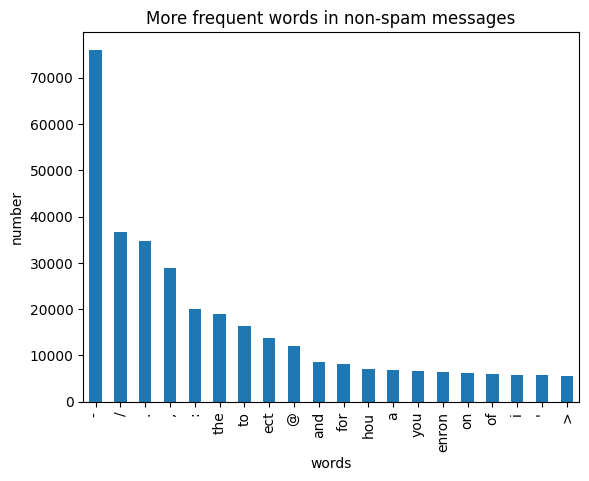

In [25]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

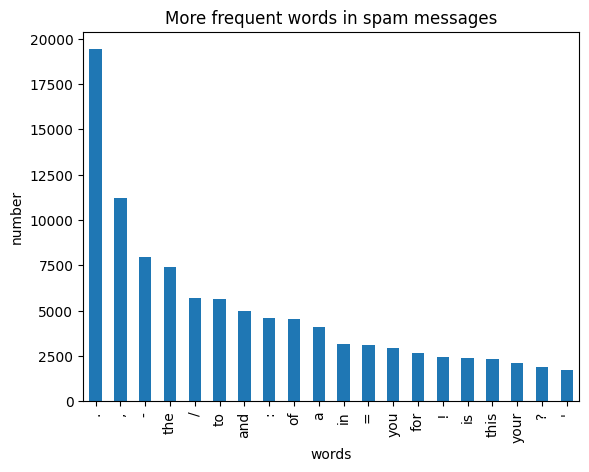

In [26]:
df2.plot.bar(legend = False)
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [27]:
from nltk import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

data['Message'] = data['Message'].str.lower()
data['Message'] = data['Message'].str.replace(r'\W+', ' ')
data['Message'] = data['Message'].str.replace(r'\s+', ' ')
data['Message'] = data['Message'].str.strip()
data['Message'] = data['Message'].str.replace(r'\b\w\b', '')    
data['Message'] = data['Message'].str.replace(r'\b\w{1,2}\b', '')
data['Message'] = data['Message'].str.replace(r'\s+', ' ')  

In [28]:
data.head()

,Label,Message
0,ham,subject: enron methanol ; meter # : 988291\r\n...
1,ham,"subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"subject: photoshop , windows , office . cheap ..."
4,ham,subject: re : indian springs\r\nthis deal is t...


In [29]:
stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
def stemming(message):
    message = message.split()
    message = [ps.stem(word) for word in message if word not in stopwords]
    return ' '.join(message)

In [30]:
example = 'This is a test message'
print(stemming(example))

thi test messag


In [31]:
lemmatizer = nltk.stem.WordNetLemmatizer()  # stemming is chopping off the end of a word, lemmatizing is reducing the word to its base form
def lemmatizing(message):
    message = message.split()
    message = [lemmatizer.lemmatize(word) for word in message if word not in stopwords]
    return ' '.join(message)

In [32]:
print(lemmatizing(example))  # meaning of lemmatizing is to reduce the word to its base form meaningfully

This test message


In [33]:
data['Message'] = data['Message'].apply(lemmatizing)  # lemmatizing is more meaningful than stemming
data.head()

,Label,Message
0,ham,subject: enron methanol ; meter # : 988291 fol...
1,ham,"subject: hpl nom january 9 , 2001 ( see attach..."
2,ham,"subject: neon retreat ho ho ho , ' around wond..."
3,spam,"subject: photoshop , window , office . cheap ...."
4,ham,subject: : indian spring deal book teco pvr re...


In [34]:
print(data['Message'][0].split())  # word_tokenize is used to split the sentence into words, it is a part of nltk library

['subject:', 'enron', 'methanol', ';', 'meter', '#', ':', '988291', 'follow', 'note', 'gave', 'monday', ',', '4', '/', '3', '/', '00', '{', 'preliminary', 'flow', 'data', 'provided', 'daren', '}', '.', 'please', 'override', 'pop', "'", 'daily', 'volume', '{', 'presently', 'zero', '}', 'reflect', 'daily', 'activity', 'obtain', 'gas', 'control', '.', 'change', 'needed', 'asap', 'economics', 'purpose', '.']


In [35]:
example.split()

['This', 'is', 'a', 'test', 'message']

In [36]:
from sklearn import feature_extraction
X = feature_extraction.text.CountVectorizer(lowercase=True)
X = X.fit_transform(data['Message']).toarray()
y = data['Label'].values

In [37]:
print(X)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)  # LabelEncoder is used to convert the labels into numbers, 0 for ham and 1 for spam
y

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
type(y)

numpy.ndarray

In [40]:
pd.Series(y)

0        0
1        0
2        0
3        1
4        0
        ..
10157    1
10158    0
10159    0
10160    0
10161    0
Length: 10162, dtype: int32

In [41]:
type(X)

numpy.ndarray

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # splitting the data into training and testing data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7113, 52021), (3049, 52021), (7113,), (3049,))

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MultinomialNB(alpha=3)  # using Naive Bayes algorithm for classification
model.fit(x_train, y_train)  # fitting the model on training data
y_pred = model.predict(x_test)  # predicting the labels on testing data

print("Accuracy: ", accuracy_score(y_test, y_pred))  # checking the accuracy of the model
print("Classification Report: \n", classification_report(y_test, y_pred))  # checking the classification report of the model

Accuracy:  0.9563791407018695
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2404
           1       0.90      0.89      0.90       645

    accuracy                           0.96      3049
   macro avg       0.94      0.93      0.93      3049
weighted avg       0.96      0.96      0.96      3049

